In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan_dataset_path: str = "./data/loan_approval_dataset.csv"

In [3]:
loan_df: pd.DataFrame = pd.read_csv(loan_dataset_path)
loan_df.rename(columns=lambda name: name.strip(), inplace=True)
loan_df.set_index("loan_id", inplace=True)

In [36]:
loan_df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [4]:
loan_df["education"] = loan_df["education"].str.strip()
loan_df["self_employed"] = loan_df["self_employed"].str.strip()

In [5]:
loan_df["loan_status"] = (loan_df["loan_status"] == "Approved").astype(int)
loan_df["education"] = (loan_df["education"] == "Graduate").astype(int)
loan_df["self_employed"] = (loan_df["self_employed"] == "Yes").astype(int)

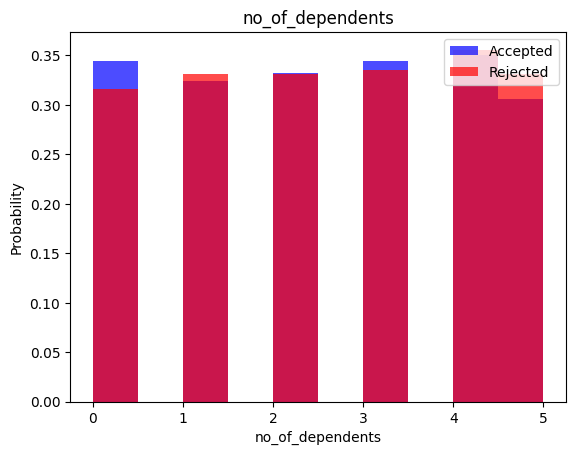

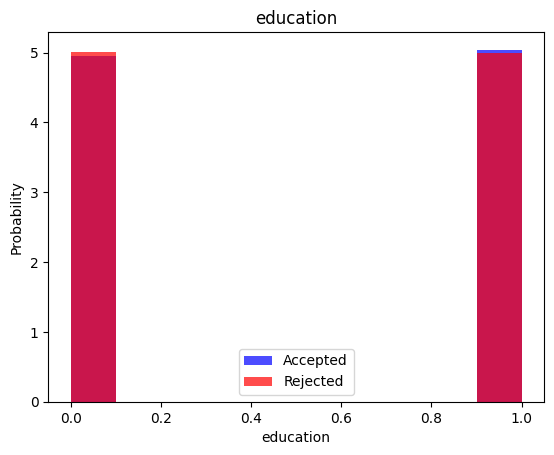

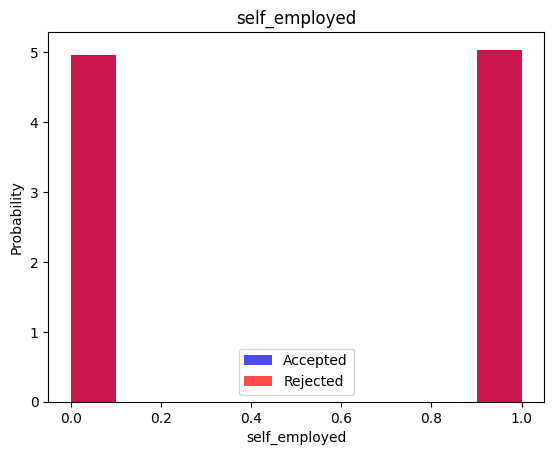

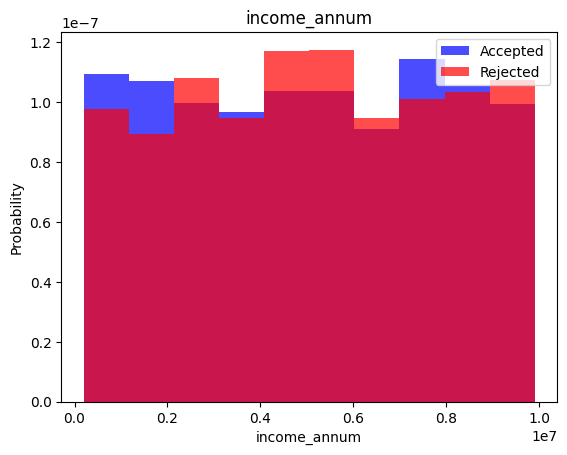

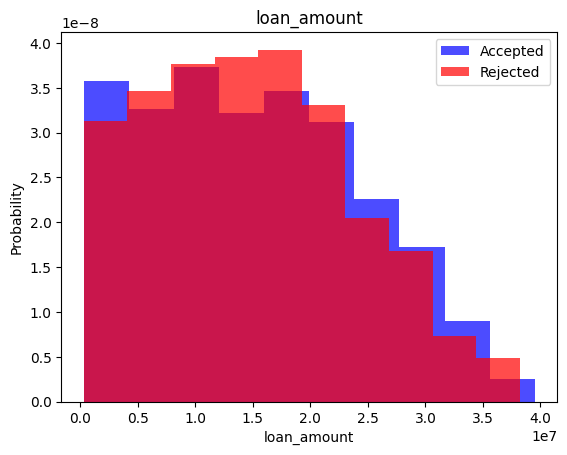

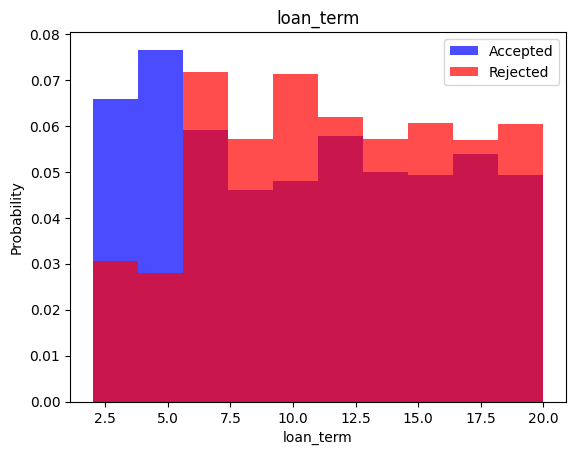

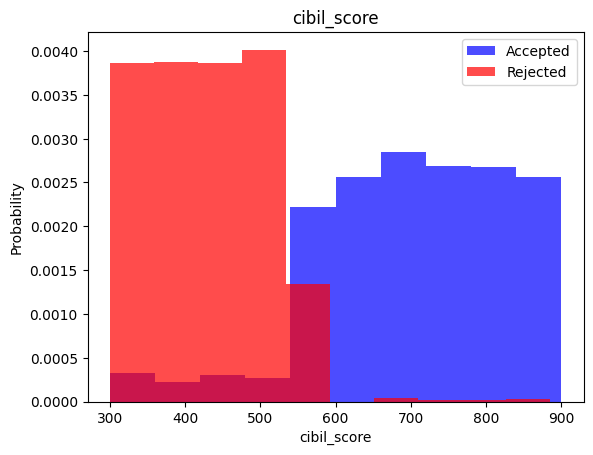

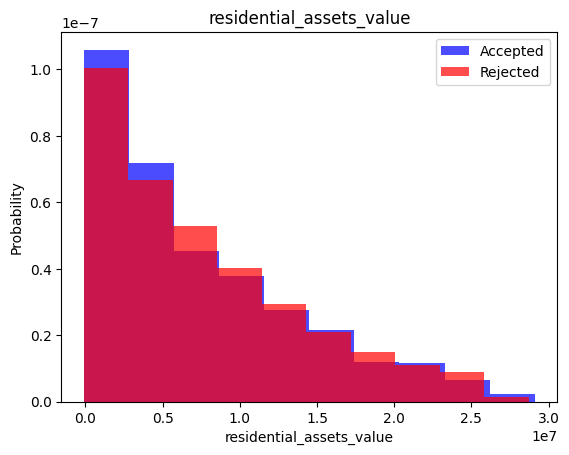

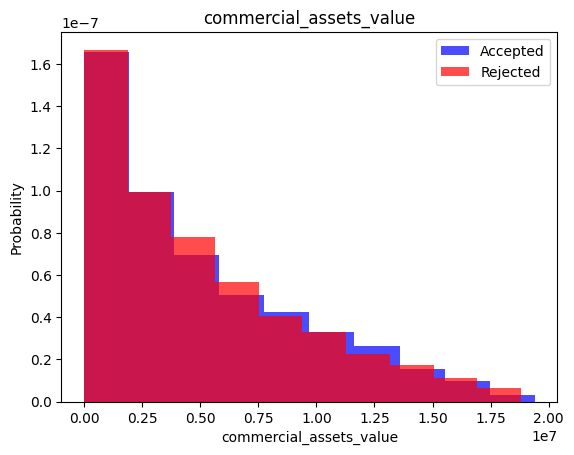

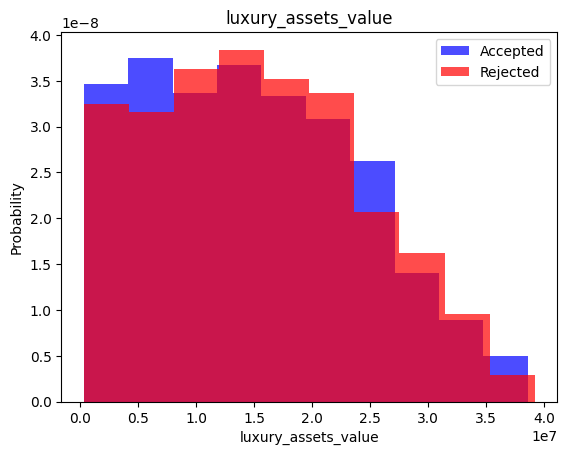

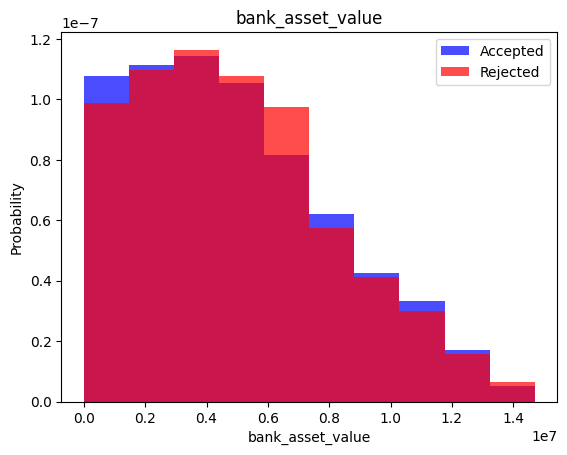

In [6]:
for feature in loan_df.columns[:-1]:
    plt.hist(
        loan_df[loan_df["loan_status"] == 1][feature],
        color="blue",
        label="Accepted",
        alpha=0.7,
        density=True,
    )
    plt.hist(
        loan_df[loan_df["loan_status"] == 0][feature],
        color="red",
        label="Rejected",
        alpha=0.7,
        density=True,
    )
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [8]:
X = loan_df[loan_df.columns[:-1]].values
y = loan_df[loan_df.columns[-1]].values
standard_scalar = StandardScaler()
X = standard_scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=69, test_size=0.3, shuffle=True
)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn_classifier.predict(X_test)

In [12]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       493
           1       0.92      0.91      0.91       788

    accuracy                           0.90      1281
   macro avg       0.89      0.89      0.89      1281
weighted avg       0.90      0.90      0.90      1281



In [13]:
from sklearn.svm import SVC

In [14]:
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)

SVC()

In [15]:
y_pred = sv_classifier.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       493
           1       0.95      0.95      0.95       788

    accuracy                           0.94      1281
   macro avg       0.94      0.94      0.94      1281
weighted avg       0.94      0.94      0.94      1281



### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_classifier = RandomForestClassifier(max_depth=17)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=17)

In [19]:
y_pred = rf_classifier.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       493
           1       0.98      0.99      0.99       788

    accuracy                           0.98      1281
   macro avg       0.99      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



### Trying Deep Neural Networks

In [21]:
# https://stackoverflow.com/a/76691103
# https://stackoverflow.com/questions/69919970/no-module-named-distutils-but-distutils-installed
# import tensorflow as tf
import keras

In [33]:
loan_model = keras.Sequential(
    [
        keras.Input(shape=(11,)),
        # keras.layers.Dropout(0.1),
        # keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation=keras.activations.relu),
    ]
)
loan_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [35]:
loan_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose="0")
loan_model.evaluate(X_test, y_test)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

[0.19357256591320038, 0.9367681741714478]